In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind
from nltk.corpus import stopwords
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu

In [2]:
pwd

'C:\\Users\\ajdou\\Desktop\\Springboard\\assignments\\Capstone Project 2'

In [3]:
#load in dataset
df = pd.read_csv('data\combined.csv', index_col = 0)

In [4]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39105 entries, 0 to 39104
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39105 non-null  object
 1   text     39104 non-null  object
 2   subject  39105 non-null  object
 3   date     39105 non-null  object
 4   label    39105 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [6]:
#drop single row with no text
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

Feature Extraction:

In [7]:
#word counts
df['text_wc']=df.text.apply(lambda x: len(x.split()))
df['title_wc'] = df.title.apply(lambda x: len(x.split()))

In [8]:
#character counts
df['text_cc'] = df['text'].str.len().astype(int)
df['title_cc'] = df['title'].str.len()

In [9]:
#average word length
def av_word_len(x):
    words = x.split()
    if len(words) > 0:
        return (sum(len(word) for word in words)/ len(words))
    else:
        return 0
df['av_word_len_text'] = df['text'].apply(av_word_len)
df['av_word_len_title'] = df['title'].apply(av_word_len)


In [10]:
#uppercase word counts
df['upper_text_wc'] = df.text.apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['upper_title_wc'] = df.title.apply(lambda x: len([x for x in x.split() if x.isupper()]))

In [11]:
#numerics count
df['numerics_text'] = df.text.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['numerics_title'] = df.title.apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [12]:
#exclamation mark count
df['exclam_text'] = df.text.str.count('!')
df['exclam_title'] = df.title.str.count('!')

In [13]:
#question mark count
df['qmark_text'] = [df.text[i].count('?') for i in range(len(df))]
df['qmark_title'] = [df.title[i].count('?') for i in range(len(df))]

In [14]:
#period count
df['period'] =[df.text[i].count('.') for i in range(len(df))]

In [15]:
#@ count
df['at_sign'] = df.text.str.count('@')

In [16]:
#stopwords
stop = stopwords.words('english')
df['stop'] = df.text.apply(lambda x: len([x for x in x.split() if x in stop]))

In [17]:
#descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,39104.0,0.457958,0.498236,0.0,0.000000,0.000000,1.000000,1.0
text_wc,39104.0,396.662873,314.557359,0.0,207.000000,364.000000,507.000000,8135.0
title_wc,39104.0,11.954122,3.676347,1.0,9.000000,11.000000,14.000000,42.0
text_cc,39104.0,2415.401570,1940.539832,1.0,1255.000000,2201.000000,3071.000000,51794.0
title_cc,39104.0,76.837740,22.282825,8.0,62.000000,71.000000,87.000000,286.0
av_word_len_text,39104.0,5.079620,1.943200,0.0,4.857506,5.071717,5.270624,149.0
av_word_len_title,39104.0,5.591023,1.424357,3.0,5.000000,5.500000,6.066667,149.0
upper_text_wc,39104.0,6.805007,9.422848,0.0,2.000000,4.000000,9.000000,309.0
upper_title_wc,39104.0,1.538462,2.353555,0.0,0.000000,1.000000,2.000000,24.0
numerics_text,39104.0,1.990589,3.064325,0.0,0.000000,1.000000,3.000000,118.0


Exploratory Data Analysis

In [18]:
fake = df[df.label==1]
true = df[df.label==0]

In [19]:
#percentage of real vs fake articles
df.label.value_counts() / len(df) * 100

0    54.204173
1    45.795827
Name: label, dtype: float64

In [20]:
#breakdown of subjects by label
df.groupby(['label', 'subject']).label.count()

label  subject        
0      politicsNews       11216
       worldnews           9980
1      Government News      532
       News                9050
       US_News              783
       left-news            705
       politics            6838
Name: label, dtype: int64

In [21]:
#subject not useful for analysis
df.drop('subject', axis=1, inplace=True)

Text(0.5, 1.0, 'Title Character Count Distribution')

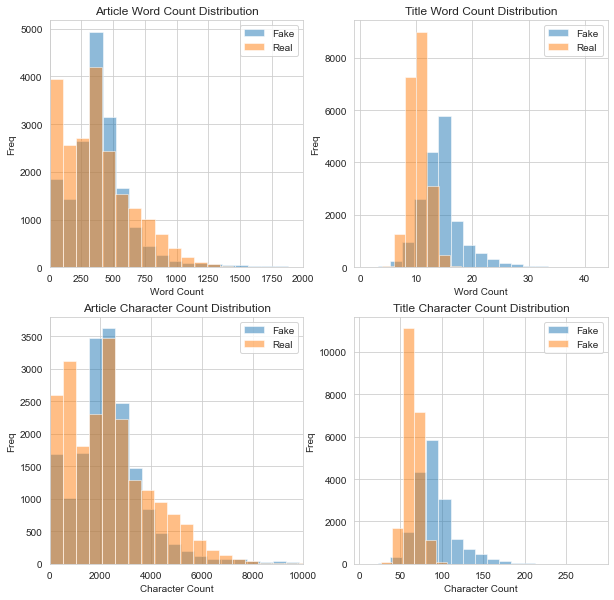

In [22]:
#histograms of character & word counts
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(fake['text_wc'], alpha=.5, bins=78, label='Fake')
plt.hist(true['text_wc'], alpha=.5, bins=50, label='Real')
plt.xlim([0,2000])
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Freq')
plt.title('Article Word Count Distribution')

plt.subplot(2,2,2)
plt.hist(fake['title_wc'], bins= 19,alpha=.5,label='Fake')
plt.hist(true['title_wc'], bins= 8,alpha=.5, label='Real')
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Freq')
plt.title('Title Word Count Distribution')

plt.subplot(2,2,3)
plt.hist(fake['text_cc'], bins=100, alpha=.5, label='Fake')
plt.hist(true['text_cc'], bins=58, alpha=.5, label='Real')
plt.xlim([0,10000])
plt.legend()
plt.xlabel('Character Count')
plt.ylabel('Freq')
plt.title('Article Character Count Distribution')

plt.subplot(2,2,4)
plt.hist(fake['title_cc'], bins=19, alpha=.5, label='Fake')
plt.hist(true['title_cc'], bins=8, alpha=.5, label='Fake')
plt.legend()
plt.xlabel('Character Count')
plt.ylabel('Freq')
plt.title('Title Character Count Distribution')

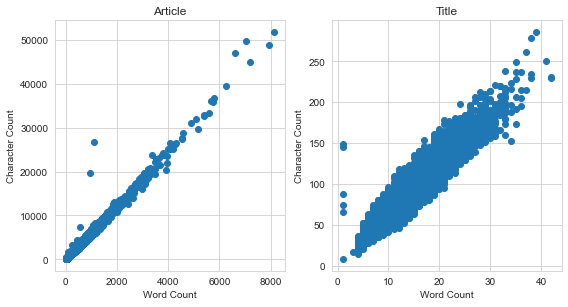

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(df.text_wc, df.text_cc)
plt.title('Article')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.subplot(2,2,2)
plt.scatter(df.title_wc, df.title_cc)
plt.title('Title')
plt.xlabel('Word Count')
plt.ylabel('Character Count')

plt.tight_layout()

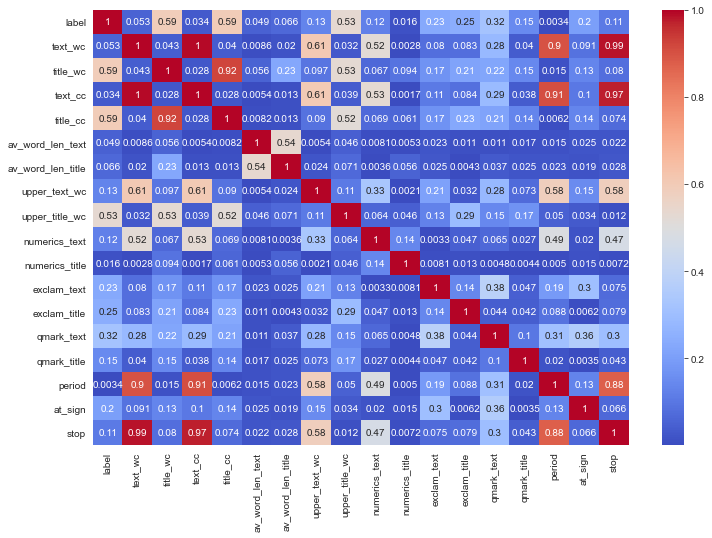

In [24]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [25]:
#drop repeated information
df.drop(['text_cc', 'title_cc', 'period'], axis=1, inplace=True)

In [26]:
#convert number of stopwords to % stopwords
df['stop_p']= df.stop / df.text_wc
df.drop('stop', axis=1, inplace=True)

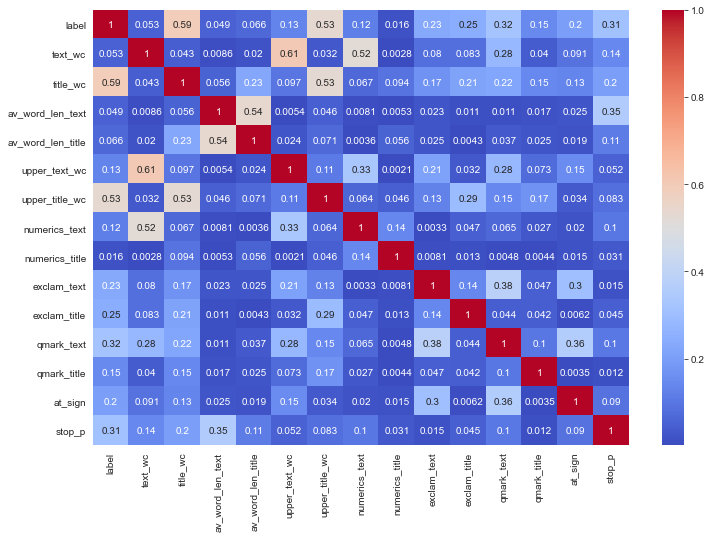

In [27]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)
plt.savefig('images/heatmap.jpg')

In [28]:
fake = df[df.label==1]
true = df[df.label==0]

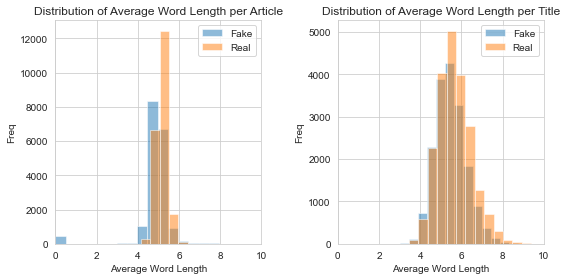

In [29]:
#histograms of average word length
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(fake['av_word_len_text'], bins=300, alpha=.5)
plt.hist(true['av_word_len_text'], bins= 15, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Average Word Length')
plt.ylabel('Freq')
plt.title('Distribution of Average Word Length per Article')
plt.legend(['Fake', 'Real'])

plt.subplot(1,2,2)
plt.hist(fake['av_word_len_title'], bins=330, alpha=.5)
plt.hist(true['av_word_len_title'],bins=15, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Average Word Length')
plt.ylabel('Freq')
plt.title('Distribution of Average Word Length per Title')
plt.legend(['Fake', 'Real'])

plt.tight_layout()

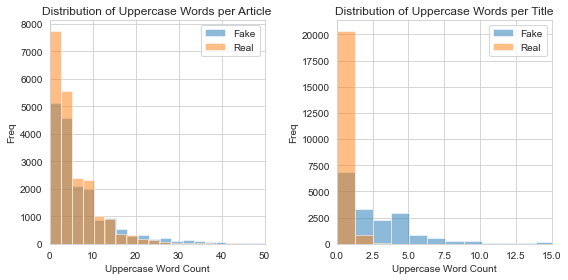

In [30]:
#histograms of uppercase words
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(fake['upper_text_wc'], bins=120, alpha=.5)
plt.hist(true['upper_text_wc'], bins=84,alpha=.5)
plt.xlim([0,50])
plt.legend(['Fake', 'Real'])
plt.xlabel('Uppercase Word Count')
plt.ylabel('Freq')
plt.title('Distribution of Uppercase Words per Article')

plt.subplot(1,2,2)
plt.hist(fake['upper_title_wc'], bins=19, alpha=.5)
plt.hist(true['upper_title_wc'], bins=4, alpha=.5)
plt.legend(['Fake', 'Real'])
plt.xlabel('Uppercase Word Count')
plt.ylabel('Freq')
plt.title('Distribution of Uppercase Words per Title')
plt.xlim([0,15])

plt.tight_layout()

Text(0, 0.5, 'Frequency')

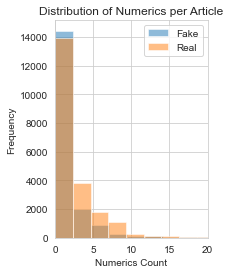

In [31]:
plt.subplot(1,2,1)
plt.hist(fake.numerics_text, bins=50, label='Fake', alpha=.5)
plt.hist(true.numerics_text, bins=31, label='Real', alpha=.5)
plt.xlim([0,20])
plt.legend()
plt.title('Distribution of Numerics per Article')
plt.xlabel('Numerics Count')
plt.ylabel('Frequency')

In [32]:
#bar plots of punctuation in the title
def barplot(N, n_zeros, col):
    #bar heights
    true_bars = np.log(true['exclam_title'].value_counts()).to_list()
    for i in range(n_zeros):
        true_bars.append(0.0)
    fake_bars = np.log(fake[col].value_counts()).to_list()
    # Position of bars on x-axis
    ind = np.arange(N)
    #width of bar
    width = 0.3       

    # Plot
    plt.figure(figsize=(8,5))
    plt.bar(ind, fake_bars , width, label='Fake', alpha=.5)
    plt.bar(ind + width, true_bars, width, label='Real', alpha=.5)
    plt.ylabel('Log Frequency')
    plt.xlabel('Count')
    plt.title(col)
    plt.xticks(ind + width / 2, ind)
    plt.legend()

Text(0.5, 1.0, 'Numerics per Title')

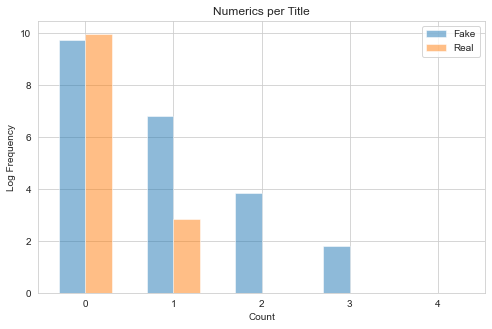

In [43]:
barplot(5,2,'numerics_title')
plt.title('Numerics per Title')

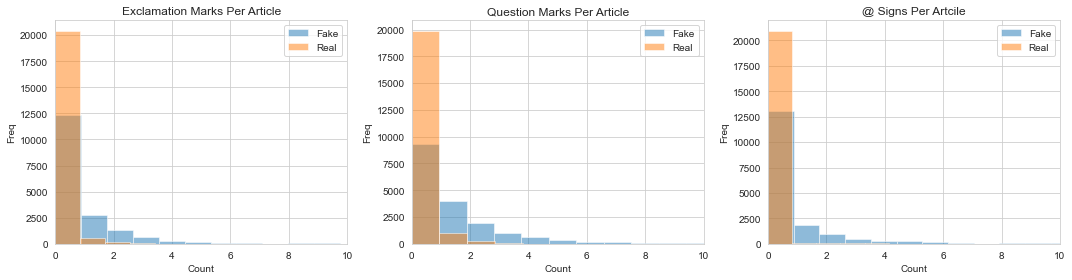

In [34]:
#distribution of punctuation
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.hist(fake['exclam_text'], bins=150, alpha=.5)
plt.hist(true['exclam_text'], bins=14, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Count')
plt.ylabel('Freq')
plt.title('Exclamation Marks Per Article')
plt.legend(['Fake', 'Real'])


plt.subplot(1,3,2)
plt.hist(fake['qmark_text'], bins=100, alpha=.5)
plt.hist(true['qmark_text'], bins=60, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Count')
plt.ylabel('Freq')
plt.title('Question Marks Per Article')
plt.legend(['Fake', 'Real'])


plt.subplot(1,3,3)
plt.hist(fake['at_sign'], bins=100, alpha=.5)
plt.hist(true['at_sign'], bins=23, alpha=.5)
plt.xlim([0,10])
plt.xlabel('Count')
plt.ylabel('Freq')
plt.title('@ Signs Per Artcile')
plt.legend(['Fake', 'Real'])

plt.tight_layout()

Text(0.5, 1.0, 'Question Marks per Title')

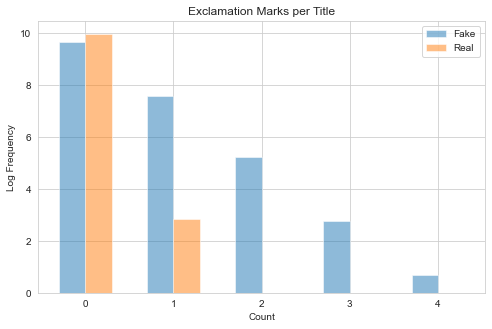

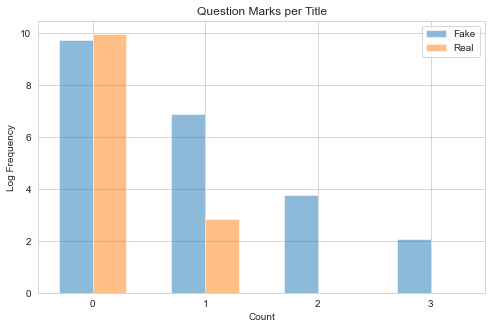

In [35]:
#barplots of punctuation in the title
barplot(5,2,'exclam_title')
plt.title('Exclamation Marks per Title')
barplot(4,1,'qmark_title')
plt.title('Question Marks per Title')

C:\Users\ajdou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ajdou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


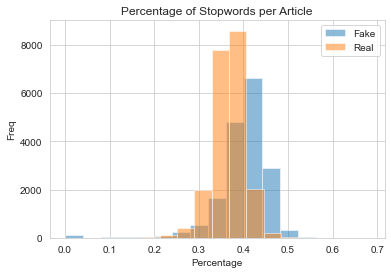

In [36]:
#percentage of stop words per article
plt.hist(fake['stop_p'], bins=17, alpha=.5)
plt.hist(true['stop_p'], bins=11,alpha=.5)
plt.xlabel('Percentage')
plt.ylabel('Freq')
plt.title('Percentage of Stopwords per Article')
plt.legend(['Fake', 'Real'])

Hypothesis Testing

In [37]:
#feature means grouped by label
df.groupby('label').mean()

,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,exclam_title,qmark_text,qmark_title,at_sign,stop_p
label,,,,,,,,,,,,,,
0,381.431921,9.951217,5.167209,5.677599,5.644839,0.386394,2.336384,0.049019,0.062134,0.000896,0.099453,0.006605,0.038073,0.366812
1,414.690306,14.324771,4.975949,5.488551,8.178189,2.902055,1.581304,0.056399,0.723420,0.131394,1.202256,0.060922,1.351072,0.399351


In [38]:
#on average...
#fake articles have higher word counts but shorter words
#fake artciles have more uppercase words, punctuation, and stopwords
#real articles have more numerics

In [39]:
#test if distributions are normal
for col in df.columns[4:17]:
    print(col+':','pval =', normaltest(df[col])[1])

text_wc: pval = 0.0
title_wc: pval = 0.0
av_word_len_text: pval = 0.0
av_word_len_title: pval = 0.0
upper_text_wc: pval = 0.0
upper_title_wc: pval = 0.0
numerics_text: pval = 0.0
numerics_title: pval = 0.0
exclam_text: pval = 0.0
exclam_title: pval = 0.0
qmark_text: pval = 0.0
qmark_title: pval = 0.0
at_sign: pval = 0.0


In [40]:
#distributions are not normal, must apply nonparametric tests
#Mann Whitney U test
test_stats = {}
for col in df.columns[4:18]:
    stat, pval = mannwhitneyu(fake[col], true[col])
    test_stats[col] = [stat,pval]
pd.DataFrame(test_stats, index=['u_statistic', 'p_value']).T

,u_statistic,p_value
text_wc,177604975.0,3.141590e-28
title_wc,49189698.0,0.000000e+00
av_word_len_text,109232149.5,0.000000e+00
av_word_len_title,160428263.0,6.635840e-154
upper_text_wc,165549143.5,2.667977e-106
upper_title_wc,55925001.5,0.000000e+00
numerics_text,152020611.5,2.905601e-270
numerics_title,188761471.0,7.242308e-03
exclam_text,137122963.5,0.000000e+00
exclam_title,167407410.5,0.000000e+00


In [41]:
df

,title,text,date,label,text_wc,title_wc,av_word_len_text,av_word_len_title,upper_text_wc,upper_title_wc,numerics_text,numerics_title,exclam_text,exclam_title,qmark_text,qmark_title,at_sign,stop_p
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",1,495,12,4.804040,5.583333,5,0,4,0,6,0,9,0,13,0.375758
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",1,305,8,5.213115,7.625000,3,0,0,0,0,0,0,0,0,0.390164
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",1,580,15,5.168966,5.000000,42,0,0,0,2,0,4,0,14,0.360345
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",1,444,14,5.180180,4.571429,5,1,5,0,0,0,1,0,8,0.360360
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",1,420,11,4.554762,5.363636,0,0,0,0,0,0,0,0,0,0.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39099,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,"August 22, 2017",0,463,9,5.008639,5.888889,14,2,3,0,0,0,0,0,0,0.386609
39100,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...","August 22, 2017",0,122,7,5.336066,6.571429,0,0,0,0,0,0,0,0,0,0.368852
39101,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,"August 22, 2017",0,317,7,5.044164,6.142857,4,0,3,0,0,0,0,0,0,0.400631
39102,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,"August 22, 2017",0,202,9,4.806931,5.888889,0,0,0,0,0,0,0,0,0,0.400990


In [42]:
df.to_csv('data/added_features.csv')